<a href="https://colab.research.google.com/github/UTEDungNguyen/Artificial-Intelligent/blob/main/Face_Identify_Class_Member.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_create=ImageDataGenerator(rescale=1./255, shear_range=0.2, 
                              zoom_range=0.2, horizontal_flip=True)

In [5]:
# Tạo bộ dữ liệu training set
training_set=train_create.flow_from_directory('/content/drive/MyDrive/FaceClass/train',
                                            target_size=(30,40), batch_size=32, class_mode='categorical')

Found 1440 images belonging to 24 classes.


In [6]:
# Câu lệnh hiện lên các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Anh Kiet': 0,
 'Bao Thai': 1,
 'Bui Dang Khoa': 2,
 'Hau': 3,
 'Hoai Phong': 4,
 'Hoang Thanh': 5,
 'Hong Phuc': 6,
 'Huu Long': 7,
 'Minh Tien': 8,
 'Ngoc Hieu': 9,
 'Ngoc Minh': 10,
 'Ngoc Sang': 11,
 'Ngoc Thach': 12,
 'Nguyen Bui Anh Kiet': 13,
 'Nguyen Hoang': 14,
 'Nguyen Tuan Kiet': 15,
 'Pham Quang Huy': 16,
 'Phuc Dung': 17,
 'Quang Huy': 18,
 'Quang Phuc': 19,
 'Son Tung': 20,
 'Tan Dat': 21,
 'Tan Phat': 22,
 'Viet Ha': 23}

In [7]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(30,40,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(512,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(24,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                    

In [8]:
# Gán biến lại để vẽ đồ thị, với 50 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size)
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
45/45 [==============================] - 295s 6s/step - loss: 2.3178 - accuracy: 0.4361
Epoch 2/50
45/45 [==============================] - 3s 71ms/step - loss: 0.4205 - accuracy: 0.8819
Epoch 3/50
45/45 [==============================] - 3s 72ms/step - loss: 0.2207 - accuracy: 0.9458
Epoch 4/50
45/45 [==============================] - 4s 80ms/step - loss: 0.1222 - accuracy: 0.9646
Epoch 5/50
45/45 [==============================] - 3s 74ms/step - loss: 0.0853 - accuracy: 0.9764
Epoch 6/50
45/45 [==============================] - 3s 72ms/step - loss: 0.0595 - accuracy: 0.9896
Epoch 7/50
45/45 [==============================] - 3s 73ms/step - loss: 0.0539 - accuracy: 0.9868
Epoch 8/50
45/45 [==============================] - 4s 80ms/step - loss: 0.0508 - accuracy: 0.9903
Epoch 9/50
45/45 [==============================] - 3s 75ms/step - loss: 0.0570 - accuracy: 0.9875
Epoch 10/50
45/45 [==============================] - 3s 74ms/step - loss: 0.0297 - accuracy: 0.9917
Epoch 11/

In [9]:
model.save('/content/drive/MyDrive/Model Save/Face_Identify_ClassMember.h5')

In [10]:
# Tiến hành đánh giá độ chính xác của mô hình 
Eva=model.evaluate(training_set,verbose=0)
print('Train Loss', Eva[0])
print('Train Accuracy', Eva[1])

Train Loss 0.005954232532531023
Train Accuracy 0.9993055462837219


<ipython-input-11-0ce7c54ca4e5>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


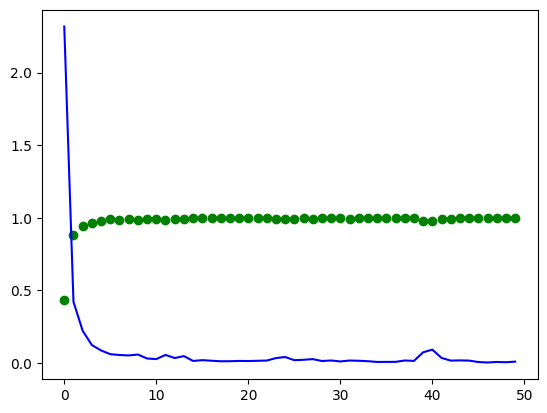

In [11]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

In [12]:
model_face_identify= load_model('/content/drive/MyDrive/Model Save/Face_Identify_ClassMember.h5')

1/1 [==============================] - 0s 18ms/step
Phuc Dung


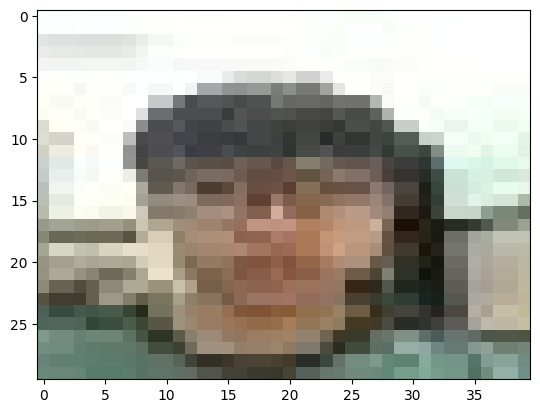

1/1 [==============================] - 0s 19ms/step
Tan Phat


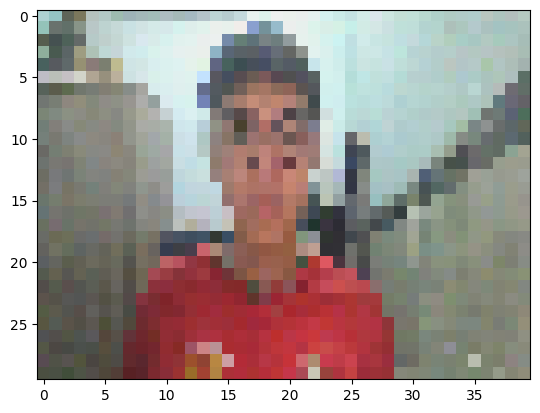

1/1 [==============================] - 0s 19ms/step
Viet Ha


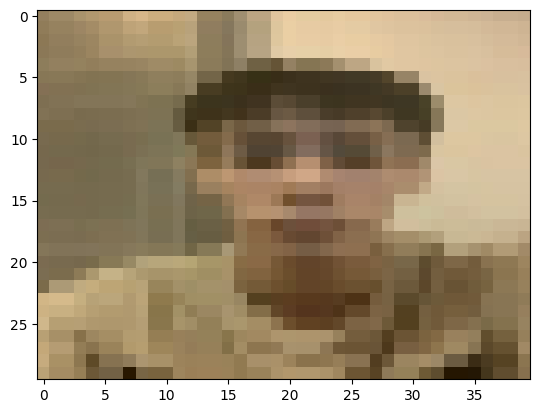

1/1 [==============================] - 0s 17ms/step
Nguyen Hoang


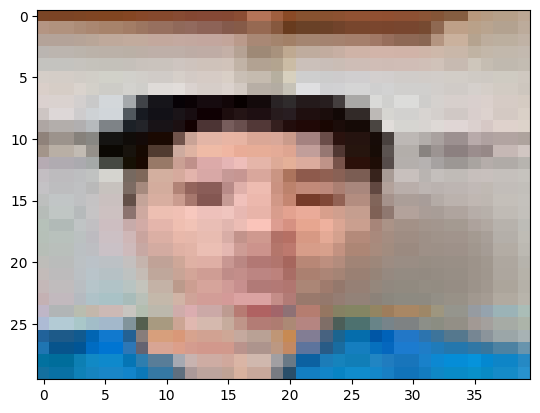

1/1 [==============================] - 0s 20ms/step
Nguyen Bui Anh Kiet


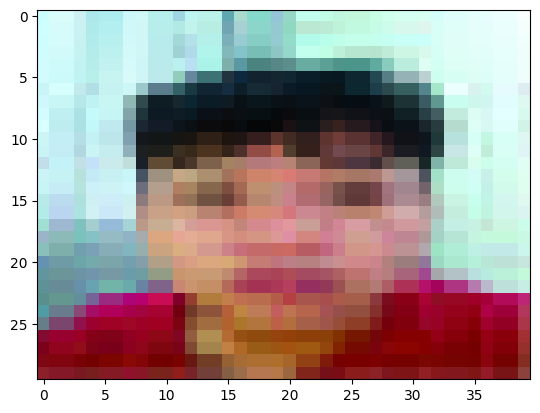

1/1 [==============================] - 0s 19ms/step
Huu Long


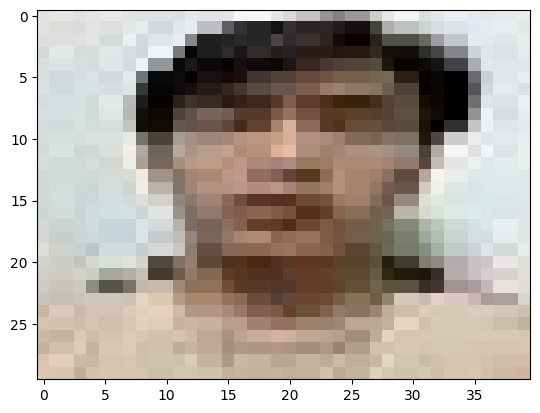

1/1 [==============================] - 0s 18ms/step
Hau


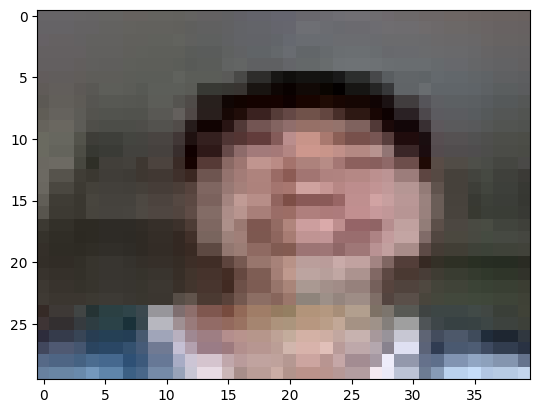

In [14]:
# Đường dẫn thư mục test
test="/content/drive/MyDrive/Hinh Test Trong Lop"

# Quét hết các hình trong đường dẫn và tiến hành dự đoán tên thành viên
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(30,40))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_face_identify.predict(img).argmax())
  member_name=['Anh Kiet','Bao Thai','Bui Dang Khoa','Hau','Hoai Phong', 'Hoang Thanh', 'Hong Phuc', 'Huu Long', 'Minh Tien',
              'Ngoc Hieu', 'Ngoc Minh', 'Ngoc Sang', 'Ngoc Thach','Nguyen Bui Anh Kiet', 'Nguyen Hoang', 'Nguyen Tuan Kiet', 'Pham Quang Huy',
              'Phuc Dung', 'Quang Huy', 'Quang Phuc', 'Son Tung', 'Tan Dat', 'Tan Phat', 'Viet Ha']
  print(member_name[result])
  plt.show()